In [6]:
# ! pip install yfinance
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

# Get data from yahoo finance
sd = dt.datetime(1998,12,4)
ed = dt.datetime(2023,3,14)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ', sd, ed)
# 2x leveraged nasdaq 100 etf
qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD', sd, ed)
# 3x leveraged nasdaq 100 etf
tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ', sd, ed)
#nasdaq 100 index
ndx = ab.StockData('NDX')
ndx.get_data_from_yfinance('NDX', sd, ed)
#S&P 500 etf
spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY', sd, ed)
#nasdaq stocks above 200 day moving average percentage
naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
#buy and hold strategy vs various  strategies
def backtestAll(ticker:ab.StockData, indicator:ab.StockData, test_start:dt.datetime,test_end:dt.datetime, verbose = True, weekly_buy=False, weekly_sell=False):
    perf_summary = pd.DataFrame()
    buy_and_hold = ab.BuyAndHold() 
    buy_and_hold.run_strategy(ticker, test_start,test_end)
    bt = ab.BackTest()
    bt.run_backtest(buy_and_hold, ticker, test_start, test_end)

    macross_strategy = ab.MACross('Ma Cross',50, 200)
    macross_strategy.run_strategy(indicator, test_start ,test_end)
    ma_cross_bt = ab.BackTest()
    ma_cross_bt.run_backtest(macross_strategy, ticker,test_start, test_end, weekly_buy,weekly_sell)

    threshold_strategy = ab.Threshold(name='NAA200R', buy_threshold = 15, sell_threshold = 30, signal_ma_window=20)
    threshold_strategy.run_strategy(naa200r, test_start , test_end)
    naa200r_threshold_bt = ab.BackTest()
    naa200r_threshold_bt.run_backtest(threshold_strategy, ticker, test_start , test_end, weekly_buy,weekly_sell)

    threshold_strategy_2 = ab.Threshold(name='NAA200R', buy_threshold = 15, sell_threshold = 30, signal_ma_window=40)
    threshold_strategy_2.run_strategy(naa200r, test_start , test_end)
    naa200r_threshold_bt_2 = ab.BackTest()
    naa200r_threshold_bt_2.run_backtest(threshold_strategy_2, ticker,test_start , test_end, weekly_buy,weekly_sell)

    ma_threshold = ab.MAThreshold('NAA200R SMA21', ma_window = 21,buy_threshold = 1, sell_threshold = 1)
    ma_threshold.run_strategy(indicator, test_start,test_end)
    ma_threshold_bt = ab.BackTest()
    ma_threshold_bt.run_backtest(ma_threshold, ticker,test_start, test_end, weekly_buy,weekly_sell)

    ma_threshold2 = ab.MAThreshold('SMA200', ma_window = 200,buy_threshold = 1.03, sell_threshold = 0.95)
    ma_threshold2.run_strategy(indicator, test_start,test_end)
    ma_threshold2_bt = ab.BackTest()
    ma_threshold2_bt.run_backtest(ma_threshold2, ticker,test_start, test_end, weekly_buy,weekly_sell)
    
    #WeeklyMAThreshold = ab.WeeklyMAThreshold('2W SMA200', ma_window =40,buy_threshold=1,sell_threshold=1)
    #WeeklyMAThreshold.run_strategy(indicator, test_start , test_end)
    #WeeklyMAThreshold_bt = ab.BackTest()
    #WeeklyMAThreshold_bt.run_backtest(WeeklyMAThreshold, ticker, test_start , test_end, weekly_buy,weekly_sell)

    print('Backtest for', ticker.ticker)
    bt.performance_summary()
    ma_cross_bt.performance_summary()
    naa200r_threshold_bt.performance_summary()
    naa200r_threshold_bt_2.performance_summary()
    ma_threshold_bt.performance_summary()
    ma_threshold2_bt.performance_summary()
    #WeeklyMAThreshold_bt.performance_summary()
    
    fig = plt.figure(figsize=(16,4))
    plt.plot(bt.balance['Date'], bt.balance['Total'], label = bt.name ,color = 'blue')
    plt.plot(ma_cross_bt.balance['Date'], ma_cross_bt.balance['Total'], label = ma_cross_bt.name, color = 'red')
    plt.plot(naa200r_threshold_bt.balance['Date'], naa200r_threshold_bt.balance['Total'], label = naa200r_threshold_bt.name, color = 'green')
    plt.plot(naa200r_threshold_bt_2.balance['Date'], naa200r_threshold_bt_2.balance['Total'], label = naa200r_threshold_bt_2.name)
    plt.plot(ma_threshold_bt.balance['Date'], ma_threshold_bt.balance['Total'], label = ma_threshold_bt.name)
    plt.plot(ma_threshold2_bt.balance['Date'], ma_threshold2_bt.balance['Total'], label = ma_threshold2_bt.name)
    #plt.plot(WeeklyMAThreshold_bt.balance['Date'], WeeklyMAThreshold_bt.balance['Total'], label = WeeklyMAThreshold_bt.name)
 
    plt.legend()
    plt.title('Backtesting for {}'.format(ticker.ticker))
    plt.show()


    for strategy in [bt,ma_cross_bt,naa200r_threshold_bt, naa200r_threshold_bt_2, ma_threshold_bt, ma_threshold2_bt]:
        perf_summary = pd.concat([perf_summary, strategy.summary_result])
        
    return perf_summary


/home/zishuowang/backtesting/Ab.py:146: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  sd = indicator.data.index[indicator.data.index.get_loc(


Backtest for QQQ

Buy and Hold: 
cumulative return      : 626.00%
compound anual return  : 6.0953% 
max_drawdown           : -51.86%
sharp_ratio            : 3.28%
average of daily return: 0.0479%
std of daily return    : 1.4606%
number of trades       : 2,
trading days           : 7728,
batting Average        : 100.00%
Gain Average           : 626.00%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        

Ma Cross 50/200: 
cumulative return      : 612.60%
compound anual return  : 6.0212% 
max_drawdown           : -28.56%
sharp_ratio            : 4.10%
average of daily return: 0.0422%
std of daily return    : 1.0298%
number of trades       : 16,
trading days           : 7728,
batting Average        : 60.00%
Gain Average           : 30.01%
Loss Average           : -5.09%
Risk Reward Ratio      : 5.90
Gain STD               : 18.66%
Loss STD               : 2.87%
        

NAA200R 15/30 MA 20: 
cumulative return   

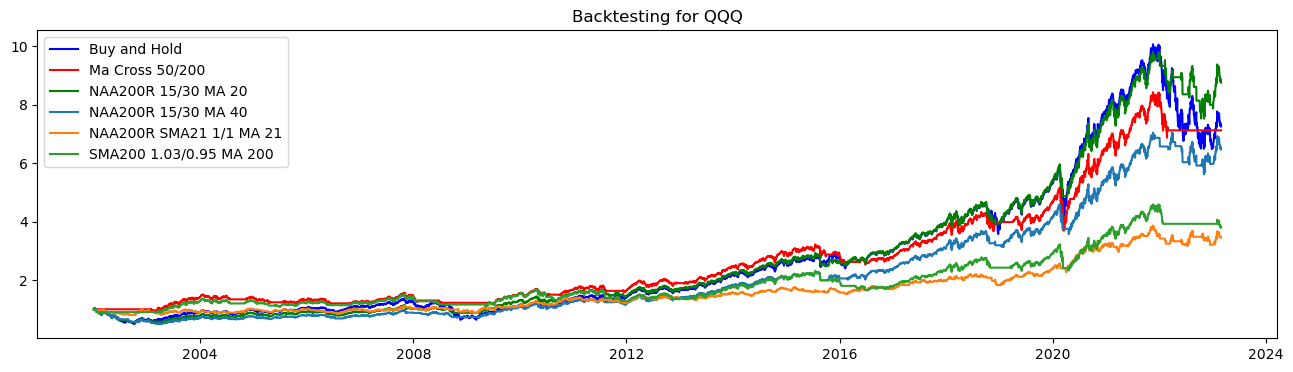

NameError: name 'WeeklyMAThreshold_bt' is not defined

In [8]:
test_start = dt.datetime(2002,1,1)
test_end = dt.datetime(2023,3,1)

perf_summary = backtestAll(qqq, qqq, test_start, test_end, verbose = False)
display(perf_summary)

In [ ]:
test_start = dt.datetime(2010,3,1)
test_end = dt.datetime(2023,3,1)
perf_summary = backtestAll(qld, qqq, test_start, test_end, verbose = False)
display(perf_summary)

In [ ]:
test_start = dt.datetime(2011,3,1)
test_end = dt.datetime(2023,3,1)
perf_summary = backtestAll(tqqq, naa200r, test_start, test_end, verbose = False)
display(perf_summary)


In [ ]:
test_start = dt.datetime(2002,1,1)
test_end = dt.datetime(2023,3,1)

perf_summary = backtestAll(qqq, qqq, test_start, test_end, verbose = False, weekly_buy=True, weekly_sell=True)
display(perf_summary)


In [ ]:
test_start = dt.datetime(2010,3,1)
test_end = dt.datetime(2023,3,1)
perf_summary = backtestAll(qld, qqq, test_start, test_end, verbose = False, weekly_buy=True, weekly_sell=False)
display(perf_summary)

In [ ]:
test_start = dt.datetime(2011,3,1)
test_end = dt.datetime(2023,3,1)
perf_summary = backtestAll(tqqq, qqq, test_start, test_end, verbose = False, weekly_buy = True, weekly_sell = False)
display(perf_summary)